In [1]:
import scrublet as scr

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import scanpy as sc

In [5]:
# lib BRI-1984

In [6]:
#lib1984 = sc.read_10x_mtx('/lab-share/IM-Gutierrez-e2/Public/Lab_datasets/B_cells_citeseq/SN0268787/broad/hptmp/curtism/bwh10x/KW10456_Maria/221101_10X_KW10456_bcl/cellranger-6.1.1/GRCh38/BRI-1984/outs/filtered_feature_bc_matrix/')

In [7]:
# read already QC'ed data by selecting singlets by genetic demultiplexing and removing bad quality cells

In [8]:
lib1984 = sc.read_10x_mtx('/lab-share/IM-Gutierrez-e2/Public/vitor/lupus/citeseq/data/lib1984_matrix')

In [9]:
lib1984

AnnData object with n_obs × n_vars = 20661 × 36601
    var: 'gene_ids'

In [10]:
scrub1984 = scr.Scrublet(lib1984.X, expected_doublet_rate = 0.1)

In [11]:
lib1984.obs['doublet_score'], lib1984.obs['predicted_doublet'] = scrub1984.scrub_doublets(min_gene_variability_pctl=90, n_prin_comps=30, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 5.9%
Estimated detectable doublet fraction = 37.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 15.8%
Elapsed time: 39.1 seconds


In [12]:
# Histogram

(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

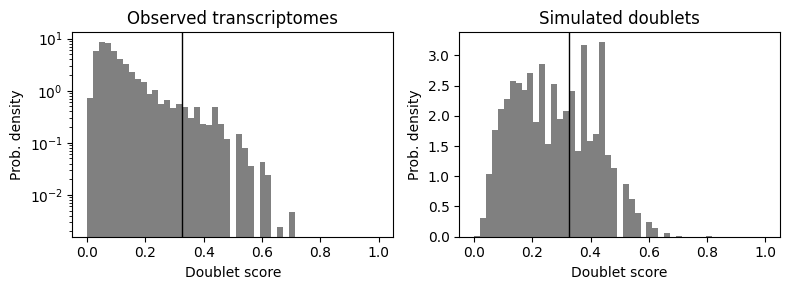

In [13]:
scrub1984.plot_histogram()

In [14]:
# t-SNE

In [15]:
scrub1984.set_embedding('t-SNE', scr.get_tsne(scrub1984.manifold_obs_, angle = 0.9))

/home/ch229163/miniconda3/envs/scrublet/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ch229163/miniconda3/envs/scrublet/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1000x500 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Predicted doublets'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>,
        <AxesSubplot:title={'center':'Doublet score'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>],
       dtype=object))

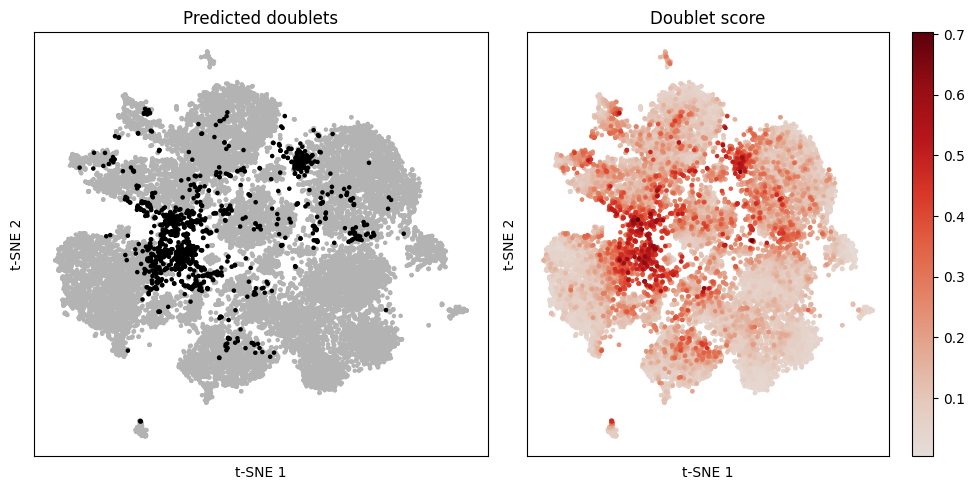

In [16]:
scrub1984.plot_embedding('t-SNE', order_points='True', fig_size=(10, 5))

In [17]:
# UMAP

In [18]:
#scrub1984.set_embedding('UMAP', scr.get_umap(scrub1984.manifold_obs_, n_neighbors = 10, min_dist=0.3)) 

In [19]:
#scrub1984.plot_embedding('UMAP', order_points='True', fig_size=(10, 5))

In [20]:
# Save results

In [33]:
pd.DataFrame(lib1984.obs).to_csv("./scrublet_calls_1984.tsv", sep = '\t', header = True)

In [22]:
# Library BRI-1988

In [23]:
#lib1988 = sc.read_10x_mtx('/lab-share/IM-Gutierrez-e2/Public/Lab_datasets/B_cells_citeseq/SN0273471/broad/hptmp/sgurajal/bwh10x/KW10598_mgutierrez/221211_10X_KW10598_bcl/cellranger-6.1.1/GRCh38/BRI-1988_hashing/outs/filtered_feature_bc_matrix/')

In [24]:
lib1988 = sc.read_10x_mtx('/lab-share/IM-Gutierrez-e2/Public/vitor/lupus/citeseq/data/lib1988_matrix')

In [25]:
lib1988

AnnData object with n_obs × n_vars = 15857 × 36601
    var: 'gene_ids'

In [26]:
scrub1988 = scr.Scrublet(lib1988.X, expected_doublet_rate = 0.1)

In [29]:
lib1988.obs['doublet_score'], lib1988.obs['predicted_doublet'] = scrub1988.scrub_doublets(min_gene_variability_pctl=90, n_prin_comps=30, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.02
Detected doublet rate = 96.5%
Estimated detectable doublet fraction = 99.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 97.2%
Elapsed time: 15.6 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

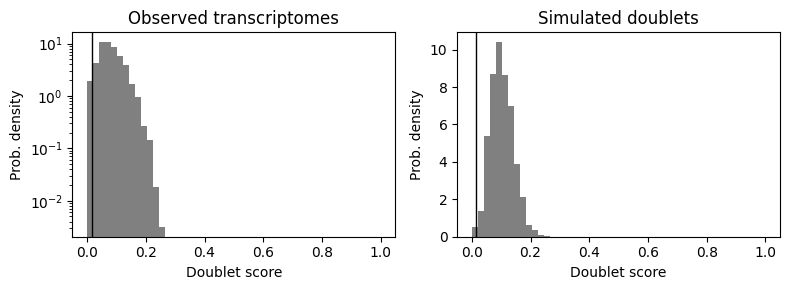

In [30]:
scrub1988.plot_histogram(fig_size=(8, 3))

In [ ]:
scrub1988.set_embedding('t-SNE', scr.get_tsne(scrub1988.manifold_obs_, angle = 0.9))

In [ ]:
scrub1988.plot_embedding('t-SNE', order_points='True', fig_size=(10, 5))

In [32]:
pd.DataFrame(lib1988.obs).to_csv("./scrublet_calls_1988.tsv", sep = '\t', header = True)

In [ ]:
# Library BRI-1990

In [5]:
lib1990 = sc.read_10x_mtx('/lab-share/IM-Gutierrez-e2/Public/vitor/lupus/citeseq/data/lib1990_matrix')

In [6]:
lib1990

AnnData object with n_obs × n_vars = 20180 × 36601
    var: 'gene_ids'

In [7]:
scrub1990 = scr.Scrublet(lib1990.X, expected_doublet_rate = 0.1)

In [8]:
lib1990.obs['doublet_score'], lib1990.obs['predicted_doublet'] = scrub1990.scrub_doublets(min_gene_variability_pctl=90, n_prin_comps=30, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 30.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 10.4%
Elapsed time: 26.9 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

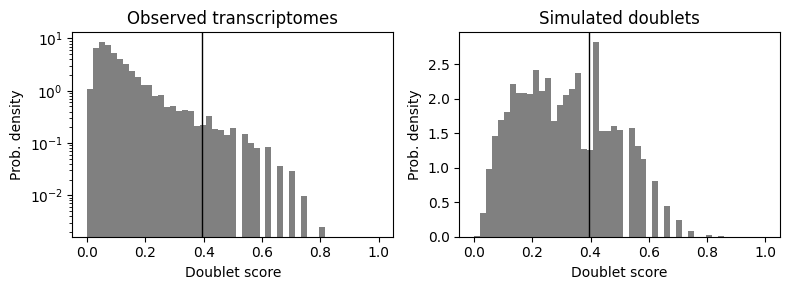

In [9]:
scrub1990.plot_histogram(fig_size=(8, 3))

In [ ]:
scrub1990.set_embedding('t-SNE', scr.get_tsne(scrub1990.manifold_obs_, angle = 0.9))

In [ ]:
scrub1990.plot_embedding('t-SNE', order_points='True', fig_size=(10, 5))

In [10]:
pd.DataFrame(lib1990.obs).to_csv("./scrublet_calls_1990.tsv", sep = '\t', header = True)